In [2]:
# first loading the datasets and filling missing values with 0.
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
df_data  = pd.read_csv('Assignment-gene_data.csv')
df_meta = pd.read_csv('Assignment-Meta_data sheet.csv')
df_data = df_data.fillna(value=0, axis=1)


Text(0.5,1,'Correlation between different features')

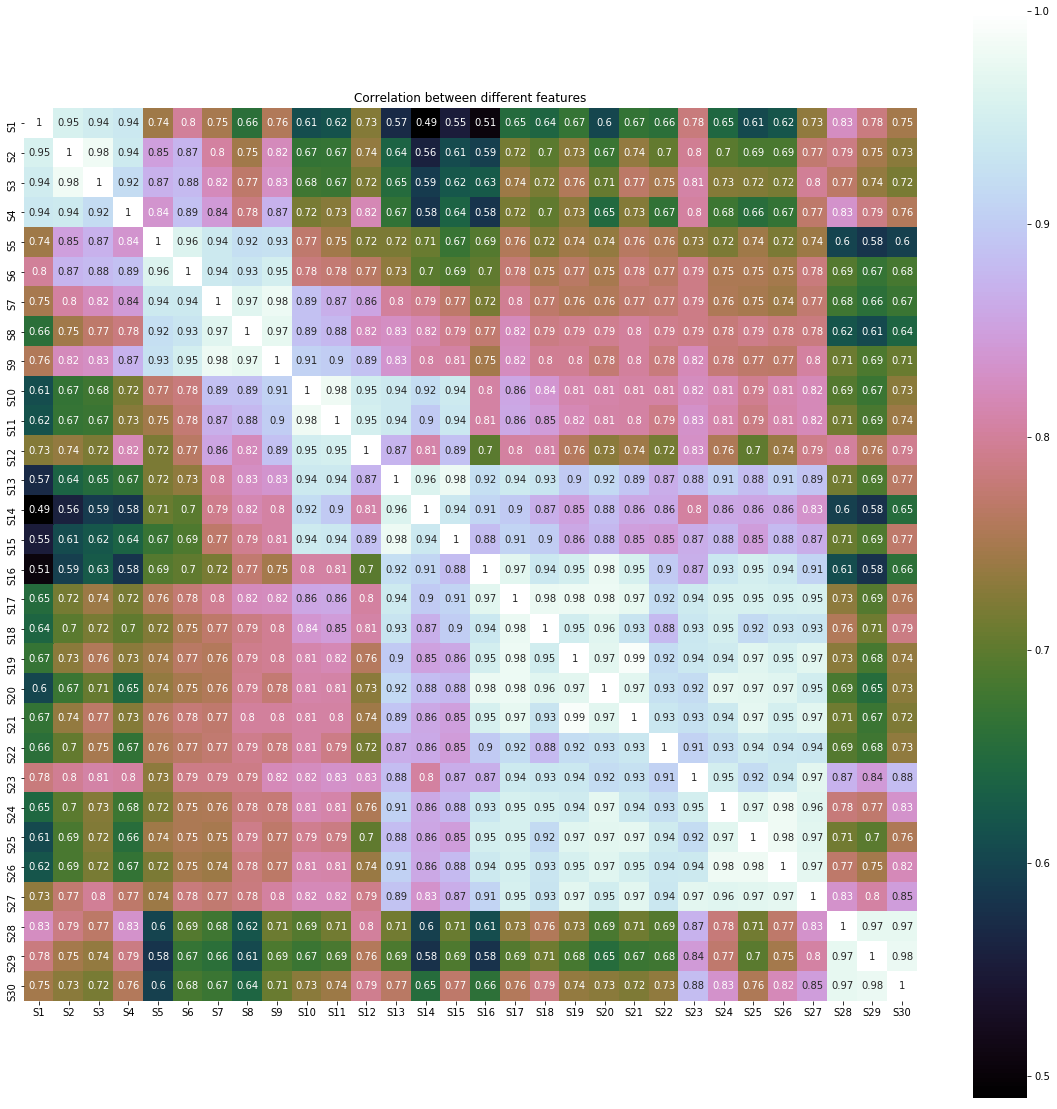

In [3]:
#df.corr() compute pairwise correlation of columns.
#Correlation shows how the two variables are related to each other.
#Positive values shows as one variable increases other variable increases as well. 
#Negative values shows as one variable increases other variable decreases.
#Bigger the values,more strongly two varibles are correlated and viceversa.

correlation = df_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')

In [4]:
#Drop the column for doing pca

df_drop=df_data.drop(labels=['symbol'],axis=1)
df_drop.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,139331.43600,90414.142190,83902.41404,155839.687100,48664.967460,60360.44535,64750.813150,51197.11731,75301.92157,79557.99512,...,96688.78770,70455.63077,111460.74530,71478.24044,67472.36824,70431.61384,107300.74450,178733.802500,184396.440300,136408.185100
1,54307.59708,33124.961560,40255.74924,35384.245090,42661.904470,39151.61583,54089.983990,44368.75989,40220.51488,41178.10732,...,31363.36228,59190.15852,40153.25825,46603.87351,39131.03069,35172.19276,36833.53111,30768.718990,36160.261740,34348.362450
2,37415.04423,45373.216020,44115.18150,45993.537390,53236.435980,29654.54509,35252.601110,34279.52789,38069.27435,38576.94508,...,25235.58744,13188.07988,16472.80365,14426.87618,15375.07087,11816.99179,12638.87611,2862.169625,2651.464137,2632.736555
3,35854.74583,42118.733060,53368.72187,52855.921990,65368.021450,55736.17432,60274.653010,79465.08861,66255.66211,89837.77209,...,158259.74910,140441.91720,84575.53514,97537.17992,138031.84020,114361.44510,118024.42430,33414.639290,31597.584840,31670.944680
4,20251.75745,7409.826412,9058.42479,7730.834511,6478.809084,9580.44916,9888.489802,13538.93033,11065.54609,8976.60352,...,22822.76602,44938.65670,33409.99879,23469.02570,21072.80173,19368.33128,21089.64675,9996.574641,21165.521270,12708.115350


In [5]:
#Standardization mean of zero and a standard deviation of one (unit variance).

X_std = StandardScaler().fit_transform(df_drop)
X_std

array([[  1.18951035e+02,   1.01406987e+02,   9.52760803e+01, ...,
          1.14987617e+02,   1.06077784e+02,   9.48406584e+01],
       [  4.62864549e+01,   3.70516158e+01,   4.56330319e+01, ...,
          1.96952278e+01,   2.07133419e+01,   2.37822410e+01],
       [  3.18494420e+01,   5.08106006e+01,   5.00226911e+01, ...,
          1.72286782e+00,   1.41670428e+00,   1.70046458e+00],
       ..., 
       [ -1.08788170e-01,  -1.35299408e-01,  -1.29182095e-01, ...,
         -1.06802221e-01,  -9.80073237e-02,  -1.17831829e-01],
       [ -1.08788170e-01,  -1.35299408e-01,  -1.29182095e-01, ...,
         -1.06802221e-01,  -9.80073237e-02,  -1.17831829e-01],
       [ -1.08788170e-01,  -1.35299408e-01,  -1.29182095e-01, ...,
         -1.06802221e-01,  -9.80073237e-02,  -1.17831829e-01]])

In [6]:
# Find Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00004462  0.95424183  0.94452904  0.93762976  0.74386666  0.80039179
   0.75059663  0.65942802  0.75776635  0.61009217  0.6155393   0.72611046
   0.57035205  0.48964553  0.55155662  0.50515493  0.65158284  0.6422139
   0.66910623  0.6016511   0.66742495  0.66068045  0.7811677   0.64512461
   0.60632355  0.62061001  0.73464539  0.8253843   0.78310408  0.74817099]
 [ 0.95424183  1.00004462  0.98282239  0.94073183  0.85020054  0.87406458
   0.80341816  0.7451638   0.82195631  0.667788    0.66928731  0.73531073
   0.63790929  0.55921547  0.60787551  0.59370582  0.71678298  0.69848709
   0.7303052   0.67369459  0.73504919  0.70383119  0.79509096  0.69834465
   0.6852759   0.68576483  0.77405261  0.78572359  0.7484602   0.73055107]
 [ 0.94452904  0.98282239  1.00004462  0.91843049  0.86876797  0.87949906
   0.82126879  0.76893915  0.8272702   0.67770602  0.67425959  0.71982513
   0.6517484   0.590163    0.62216443  0.62697745  0.74185821  0.7170972
   0.75815389  0.70

Text(0.5,1,'Correlation between different features')

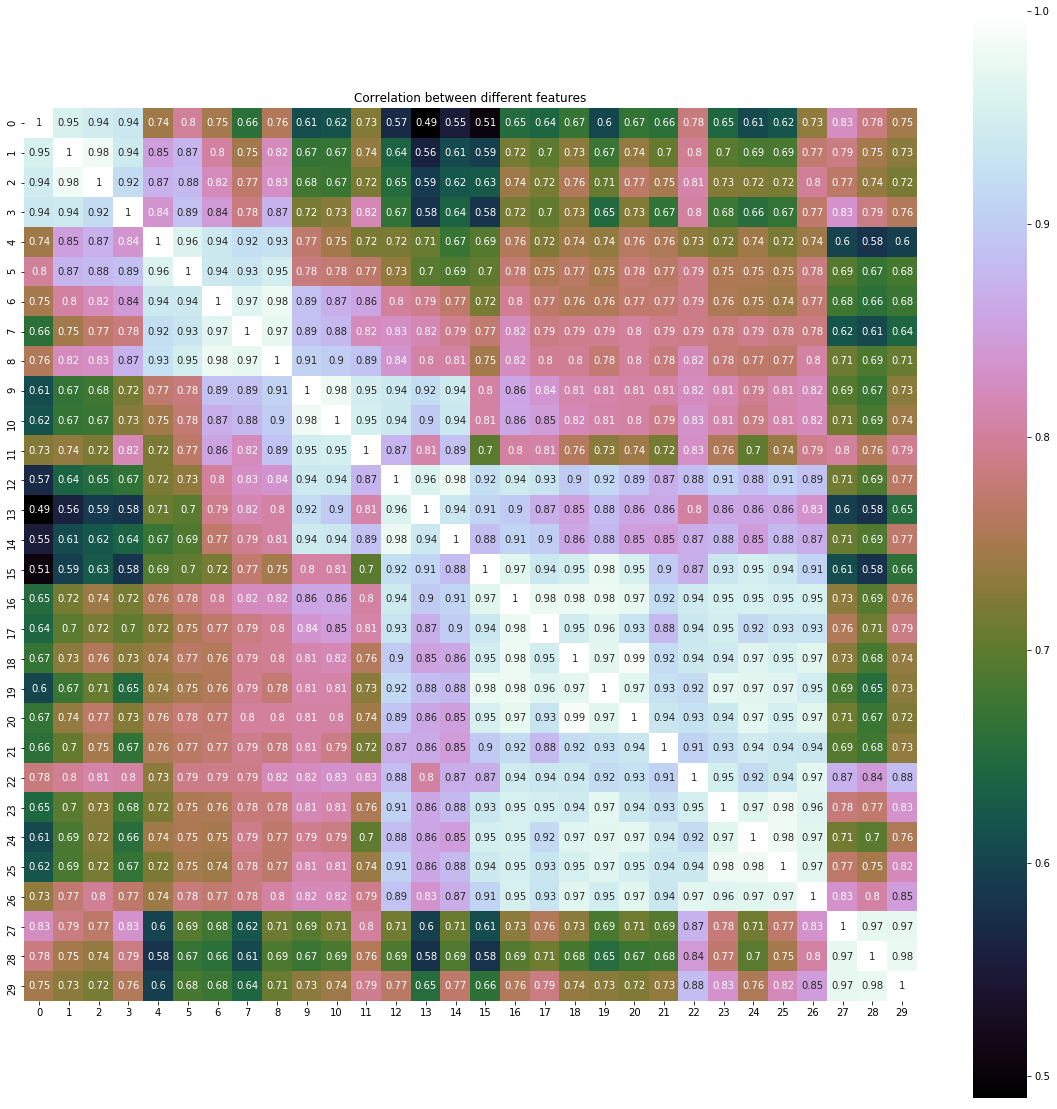

In [7]:
# Now again find correlation 

plt.figure(figsize=(20,20))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')

In [8]:
# find 
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  1.58487523e-01  -3.65617206e-01   1.31431077e-01  -1.01566628e-01
   -3.16845125e-01   1.85136743e-01  -1.95494842e-02   2.96470226e-01
    2.13281868e-01  -1.09714401e-01  -2.53783807e-01  -7.42145761e-02
   -8.29628594e-02   1.37445113e-01  -2.38171631e-01   1.34772697e-01
   -1.68594640e-01  -1.56615860e-02  -1.13097590e-01   1.23261496e-01
    1.04222149e-01   1.09410341e-01   4.32520201e-02  -2.35188137e-01
    3.34243427e-01   1.32913763e-01  -2.39808537e-01  -1.72786305e-01
    9.56518494e-02   7.56385853e-04]
 [  1.68892201e-01  -3.20783573e-01   3.18983758e-02  -1.80313316e-01
   -2.36185106e-01   1.20040503e-01   2.68933882e-01  -1.61267769e-01
   -2.52630991e-01  -1.94385043e-02  -1.14075203e-01  -2.13654399e-02
    3.47263706e-02  -1.87929452e-01   1.18090886e-01  -3.51805403e-03
    4.98153589e-01   4.66826638e-02   2.01630238e-01   3.32059238e-02
    2.39552508e-02   3.28062944e-01   3.78573574e-02   7.46426569e-03
   -1.98559759e-01  -1.88136968e-01   3

In [9]:
#Selecting Principal Components The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
24.2964461455
2.23770200851
1.39246720895
0.995406662942
0.315734420864
0.172182656186
0.120125032351
0.0852449624576
0.074365752389
0.0518721014049
0.0418005261726
0.0343968981533
0.0285211048233
0.0226709792836
0.0179366742869
0.016862165723
0.0141674219375
0.0116280790694
0.0109234763872
0.00947992498561
0.0081330496972
0.00719112487714
0.00616404718369
0.00582498965475
0.00560878603813
0.00500486858567
0.00418340515672
0.00377693598458
0.00331168886612
0.00220558967879


In [10]:
# now select how many principal components are we going to choose for our new feature subspace by explained variance
#The explained variance tells us how much information  can be attributed to each of the principal components.

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

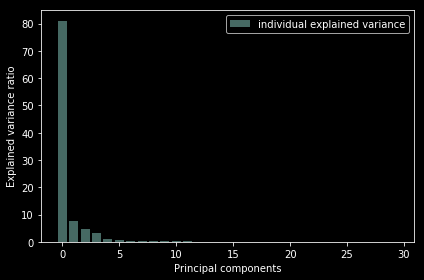

In [11]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [12]:
# The plot above clearly shows that maximum variance  can be explained by the first principal component alone followed by second ones


In [14]:
#Now the concept of  the projection matrix that will be used to transform the analytics data onto the new feature subspace. Suppose only 1st and 2nd principal 
#component shares the maximum amount of information say around 90%.Hence we can drop other components.
#Here, we are reducing the 30-dimensional feature space to a 2-dimensional feature subspace,
#by choosing the top 2 eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W


matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.15848752 -0.36561721]
 [ 0.1688922  -0.32078357]
 [ 0.17210568 -0.28759834]
 [ 0.17106267 -0.3290033 ]
 [ 0.17252261 -0.17757996]
 [ 0.17870594 -0.20440828]
 [ 0.18150103 -0.1436595 ]
 [ 0.1814783  -0.05928762]
 [ 0.18633866 -0.13356039]
 [ 0.18477091  0.05276849]
 [ 0.1844049   0.04890545]
 [ 0.17981977 -0.07930725]
 [ 0.18976116  0.17075799]
 [ 0.17947194  0.21800974]
 [ 0.18468687  0.17130992]
 [ 0.18244908  0.25767255]
 [ 0.1947994   0.14571874]
 [ 0.19123076  0.13909895]
 [ 0.19189841  0.13099098]
 [ 0.18962462  0.19057108]
 [ 0.19159649  0.12804982]
 [ 0.18686607  0.12058216]
 [ 0.19532858  0.01595284]
 [ 0.19181773  0.14013414]
 [ 0.18898144  0.16537891]
 [ 0.19095858  0.15653608]
 [ 0.19550606  0.06701694]
 [ 0.16900834 -0.17872132]
 [ 0.16331874 -0.17529171]
 [ 0.17194716 -0.09675565]]


In [15]:
#Now combining the two principal components into dataframe 
principalDf = pd.DataFrame(data = matrix_w
                 , columns = ['principal component 1', 'principal component 2'])# storing the data in dataframe with columns pc1 and pc2


In [16]:
#loading metadata in df_meta to get time at which sample taken
df_meta = pd.read_csv('Assignment-Meta_data sheet.csv')
df_meta["Time-Unit"] = df_meta["Time"].map(str) + df_meta["Unit"]
finalDf = pd.concat([principalDf, df_meta[['Time-Unit']]], axis = 1)


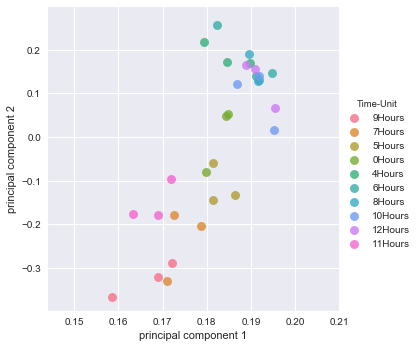

In [17]:
#finally visualize the genes with different samples and with the time 
sns.set(color_codes=True) #setting the color for background
sns.lmplot( x="principal component 1", y="principal component 2",   #plotting two principal components of samples with their corresponding time at which sample was taken
data=finalDf,  
fit_reg=False, #reduce the dimensions of gene data and to clearly see the visualization of samples vs their time
hue='Time-Unit',
legend=True,
scatter_kws={"s": 80})

Final Results of the data:

As the main aim of pca is to reduce the dimension of data into fewer columns by retaining the essence of the original data.
In the avove example same concept is applied as the data as 30 samples which are more in amount as if we visualize the dataset then 
it will be difficult for us to visualize the data due to greater no. of features.

But as a an analyst we have to find the patterns in data that describe the whole dataset.

So here in gene data we reduce the dimensions of data and find the data where it is mostly spread by  finding the direction that
maximize the variance so what happens is that pca will treat whole dataset as single unit and find those points that best describe the 
mostly covered data.

So here we perform similar task by finding  correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality 
becasue if two variables are highly correlated then they must be adjoined to make whole because it can cause reduncy in data and we will not be available to 
get good fit for data.

So here we reduce the dimensions and we see clearly visualize the samples and time unit